In [3]:
# Data handling
import pandas as pd
import numpy as np

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Load dataset from data folder
df = pd.read_csv("../data/creditcard.csv", encoding="latin1")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
numeric_df = df.select_dtypes(include=['Float64','int64']).copy()

In [8]:
x = numeric_df.drop(columns=['Class'])
y = numeric_df['Class']

In [11]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,
                                                       test_size=0.3,
                                                       random_state=42,
                                                       stratify=y
                                                       )

In [13]:
# Print shapes and class distribution
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Fraud distribution in train:\n", y_train.value_counts())
print("Fraud distribution in test:\n", y_test.value_counts())

Train shape: (199364, 30)
Test shape: (85443, 30)
Fraud distribution in train:
 Class
0    199020
1       344
Name: count, dtype: int64
Fraud distribution in test:
 Class
0    85295
1      148
Name: count, dtype: int64


In [14]:
# Apply SMOTE to training data
sm =SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE: Class
0    199020
1    199020
Name: count, dtype: int64


In [16]:
# Feature scaling (standardize numeric features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(x_test)

In [17]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [18]:
# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Train
    model.fit(X_train_scaled, y_train_res)


--- Logistic Regression ---

--- Random Forest ---

--- XGBoost ---


c:\Users\ankit\Desktop\fraud_detection_project\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [19]:
 # Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.80      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9778640267561072


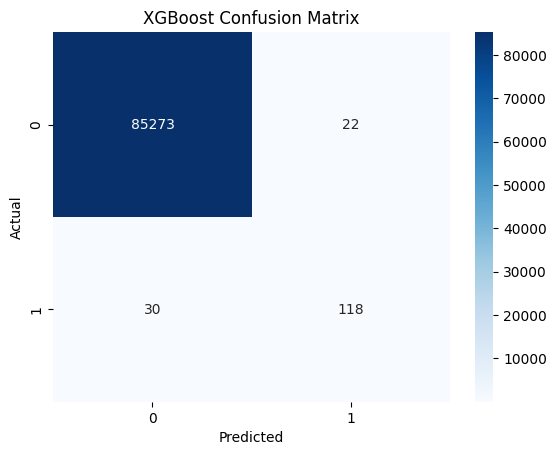

In [20]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    
    # Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
# For tree-based models only
tree_models = ["Random Forest", "XGBoost"]

In [22]:
for name in tree_models:
    model = models[name]

In [24]:
# Step 2: Features and target
numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()

X = numeric_df.drop(columns=['Class'])  # <-- This defines X
y = numeric_df['Class']

In [25]:
# Get feature importance
importances = model.feature_importances_
feature_names = X.columns
fi_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
    

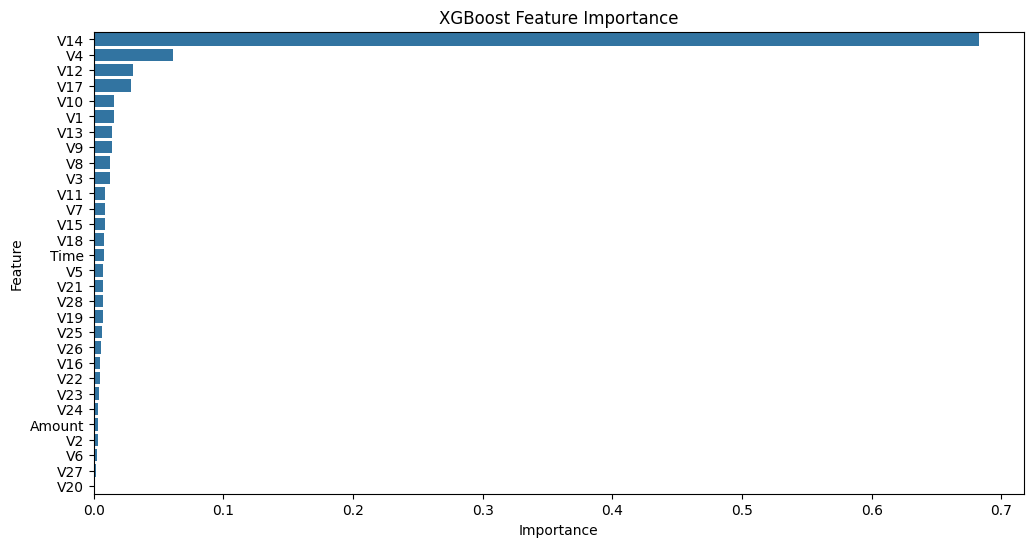


Top 10 features in XGBoost:
    Feature  Importance
14     V14    0.683102
4       V4    0.060844
12     V12    0.030405
17     V17    0.028910
10     V10    0.015922
1       V1    0.015853
13     V13    0.013950
9       V9    0.013855
8       V8    0.012592
3       V3    0.012519


In [26]:
fi_df = fi_df.sort_values(by="Importance", ascending=False)
    
    # Plot
plt.figure(figsize=(12,6))
sns.barplot(x="Importance", y="Feature", data=fi_df)
plt.title(f"{name} Feature Importance")
plt.show()
    
print(f"\nTop 10 features in {name}:\n", fi_df.head(10))

<Figure size 1000x700 with 0 Axes>

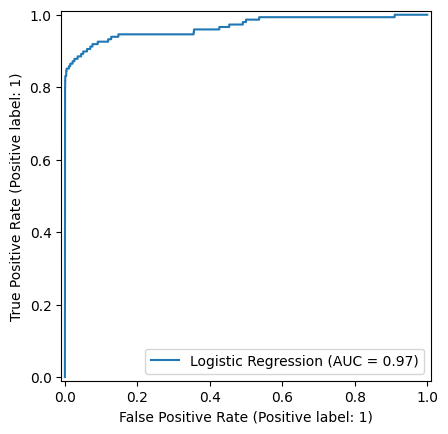

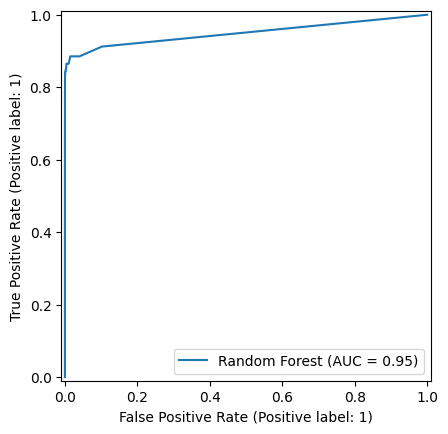

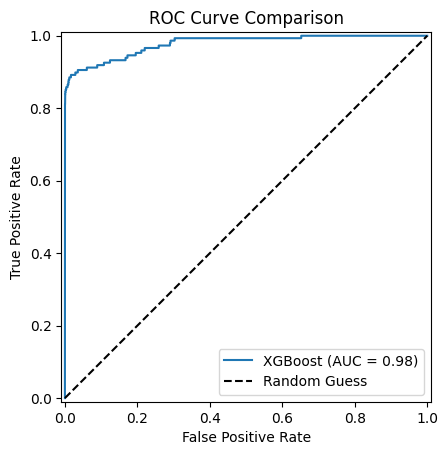

In [27]:
plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [28]:
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f"{name} ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


Logistic Regression ROC-AUC: 0.9665
Random Forest ROC-AUC: 0.9493
XGBoost ROC-AUC: 0.9779


In [29]:
import joblib

In [30]:
# Suppose Random Forest had the best performance
best_model = models["Random Forest"]

# Save the trained model
joblib.dump(best_model, "../src/best_model.pkl")

print("Best model saved as best_model.pkl in src folder")

Best model saved as best_model.pkl in src folder


FileNotFoundError: [Errno 2] No such file or directory: '../reports/models/roc_curves.png'

<Figure size 1000x700 with 0 Axes>

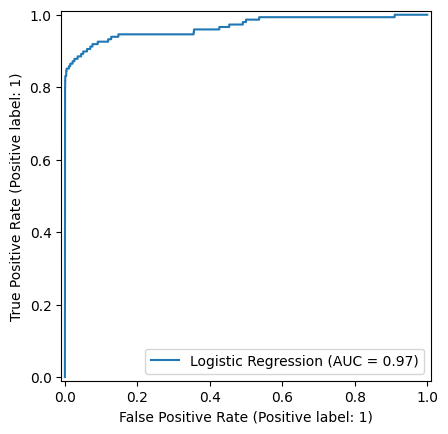

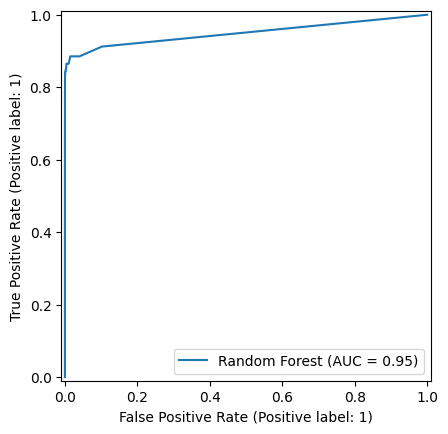

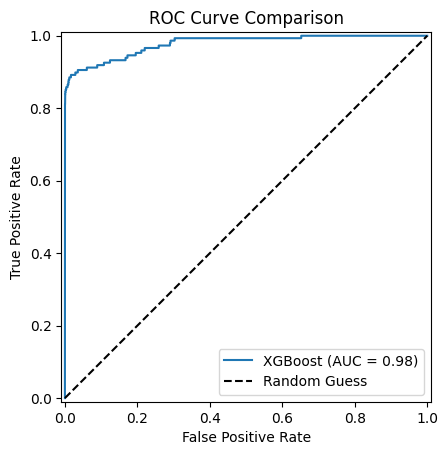

In [31]:
# Example: Save ROC curve plot
plt.figure(figsize=(10,7))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("../reports/models/roc_curves.png")  # save to reports folder
plt.show()


<Figure size 1000x700 with 0 Axes>

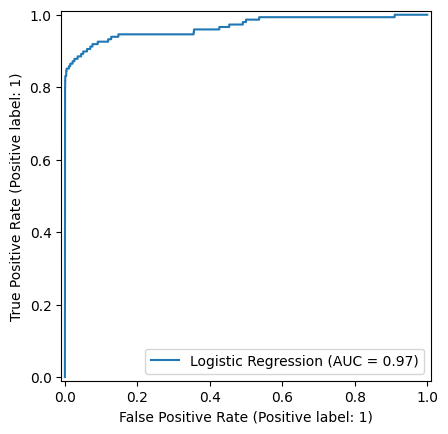

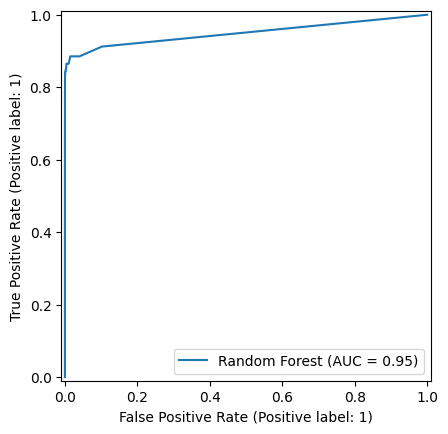

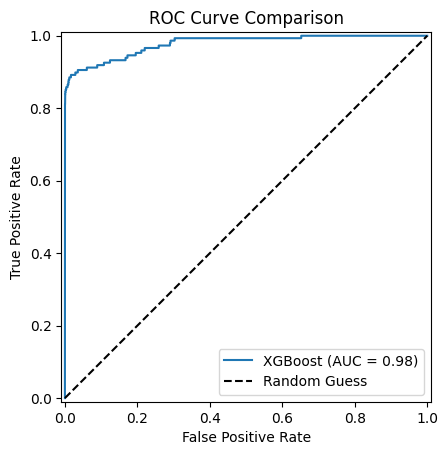

In [32]:
import os

# Create the folder if it doesn't exist
os.makedirs("../reports/models", exist_ok=True)

# Now save the ROC curve
plt.figure(figsize=(10,7))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name)

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("../reports/models/roc_curves.png")  # Save to reports folder
plt.show()
